#Aerofit_treadmill Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
#getting the number of rows and columns
df.shape

(180, 9)

In [ ]:
#checking information of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### #so by this info we can observe that there are no null values...

In [ ]:
#Descriptive statistics-describing the data
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


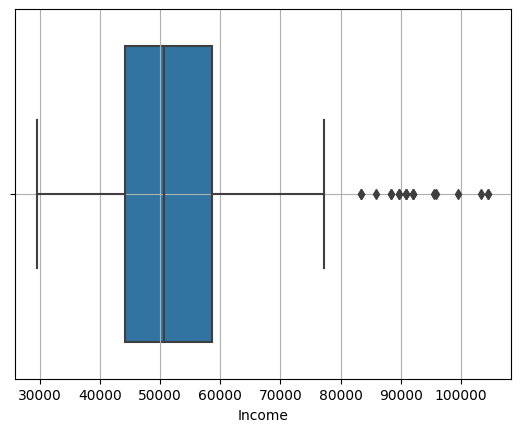

In [ ]:
#Boxplot-detecting outliers
sns.boxplot(x='Income',data=df)
plt.grid()

In [ ]:
#maximum point
upper=60000+1.5*(60000-40000)
upper

90000.0

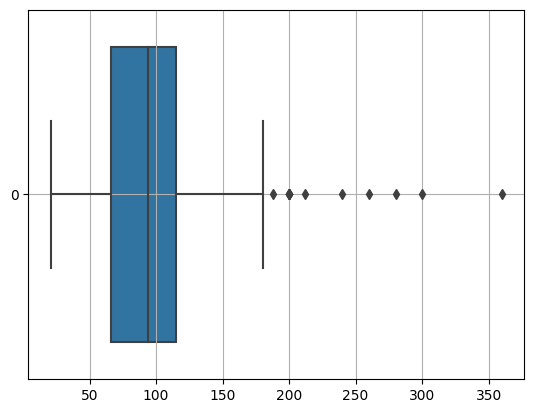

In [ ]:
sns.boxplot(df['Miles'],orient='h')
plt.grid()

In [ ]:
110+1.5*(110-60)

185.0

In [77]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

#univariate analysis

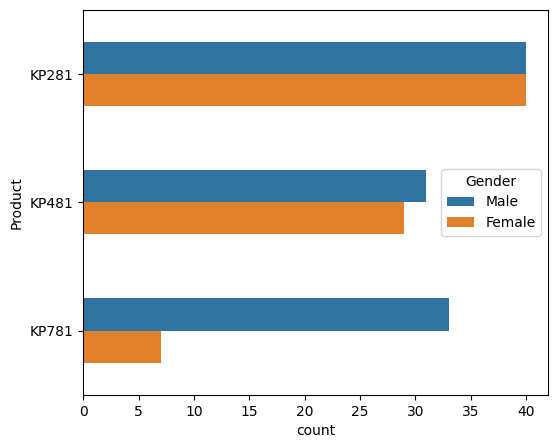

In [3]:
fig=plt.figure(figsize=(6,5))
sns.countplot(y='Product',hue='Gender',data=df,orient='h',width=0.5)
plt.show()

**so based on this plot we can infere product1(i.e,kp281) will be most used product by males and females

**Next product3(kp781) used by most of the men's

In [ ]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [24]:
#categorizing the age
ages=[17,30,44,60]
age_labels=['Young adults','Medium adults','Old adults']
df['Age_category']=pd.cut(df['Age'],bins=ages,labels=age_labels)
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_category
175,KP781,40,Male,21,Single,6,5,83416,200,Medium adults
176,KP781,42,Male,18,Single,5,4,89641,200,Medium adults
177,KP781,45,Male,16,Single,5,5,90886,160,Old adults
178,KP781,47,Male,18,Partnered,4,5,104581,120,Old adults
179,KP781,48,Male,18,Partnered,4,5,95508,180,Old adults


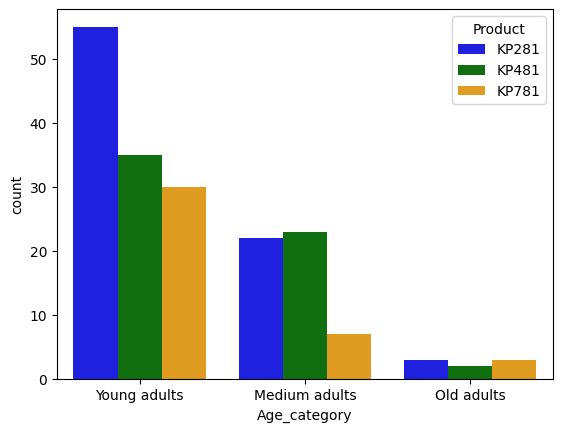

In [ ]:
sns.countplot(x='Age_category',hue='Product',data=df,palette=('blue','green','orange'))
plt.show()

**so from above plot we can see young_adults-mostly use product1(kp281)

*Medium_adults-use product2(kp481) mostly

*Old_adults-use product1(kp281) and poduct3(kp781) equally

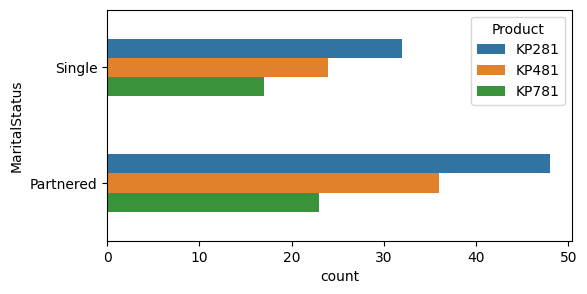

In [4]:
fig=plt.figure(figsize=(6,3))
sns.countplot(y='MaritalStatus',hue='Product',data=df,orient='h',width=0.5)
plt.show()

**so here,couples uses all three products mostly than singles..

#Bivariate analysis

<Axes: xlabel='Education', ylabel='Income'>

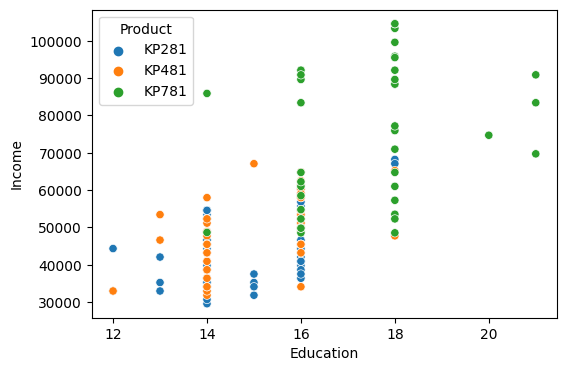

In [79]:
fig=plt.figure(figsize=(6,4))
sns.scatterplot(x='Education',y='Income',data=df,hue='Product')

**From above scatter plot we can observe that--Less education people uses mostly product1(kp281) and Highest education people uses product3(kp781) mostly

<Axes: xlabel='Fitness', ylabel='Miles'>

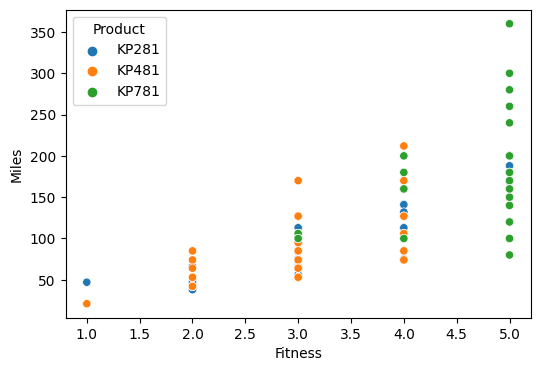

In [80]:
fig=plt.figure(figsize=(6,4))
sns.scatterplot(x='Fitness',y='Miles',hue='Product',data=df)

**From above-Good fit persons(rating 5) used product3(kp781) mostly

#Mariginal Probability

In [39]:
pd.crosstab(index=df.Gender,columns=df.Product,margins=True,margins_name='Total')

Product,KP281,KP481,KP781,Total
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
Total,80,60,40,180


**From above kp281 is mostly used product by both mens and womens(i.e,80)

In [38]:
#probability of gender using the product
pd.crosstab(index=df.Gender,columns=df.Product,margins=True,margins_name='Total',normalize='columns')

Product,KP281,KP481,KP781,Total
Gender,,,,
Female,0.5,0.483333,0.175,0.422222
Male,0.5,0.516667,0.825,0.577778



What is the probability of a male customer buying a KP781 treadmill?
*p(male|kp781)=0.825

In [31]:
#checking the average uasage of products of each age category
pd.crosstab(index=df['Age_category'],columns=df['Product'],values=df['Usage'],aggfunc=np.mean)

Product,KP281,KP481,KP781
Age_category,,,
Young adults,3.109091,3.114286,4.766667
Medium adults,3.000000,3.086957,5.000000
Old adults,3.333333,2.000000,4.333333


**By average 3 days they use the product

**And from above we can get the insight that medium and young people use the product mostly i.e,4-5 days they use product3(kp781)

In [47]:
df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [66]:
#ategorizing the income column
def func(x):
  if x<=30000:
    return 'Low'
  elif x>30000 and x<=60000:
    return 'Meidum'
  else:
    return 'High'
df['Income_category']=df['Income'].apply(func)
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_category,Income_category
175,KP781,40,Male,21,Single,6,5,83416,200,Medium adults,High
176,KP781,42,Male,18,Single,5,4,89641,200,Medium adults,High
177,KP781,45,Male,16,Single,5,5,90886,160,Old adults,High
178,KP781,47,Male,18,Partnered,4,5,104581,120,Old adults,High
179,KP781,48,Male,18,Partnered,4,5,95508,180,Old adults,High


In [67]:
#Analyzing the Income_category w.r.t rpoducts
pd.crosstab(index=df['Income_category'],columns=df['Product'],normalize='columns')

Product,KP281,KP481,KP781
Income_category,,,
High,0.0750,0.116667,0.725
Low,0.0125,0.000000,0.000
Meidum,0.9125,0.883333,0.275


---From above:

**Highest income people use the product3(kp781) mostly
i.e,p(highest|kp781)=0.725

**Meidum income people uses the product 1 and 2(kp281 & kp481) mostly
i.e,p(medium|kp281)=0.9125 and p(medium|kp481)= 0.8833

#correlation of data

<Figure size 1000x300 with 0 Axes>

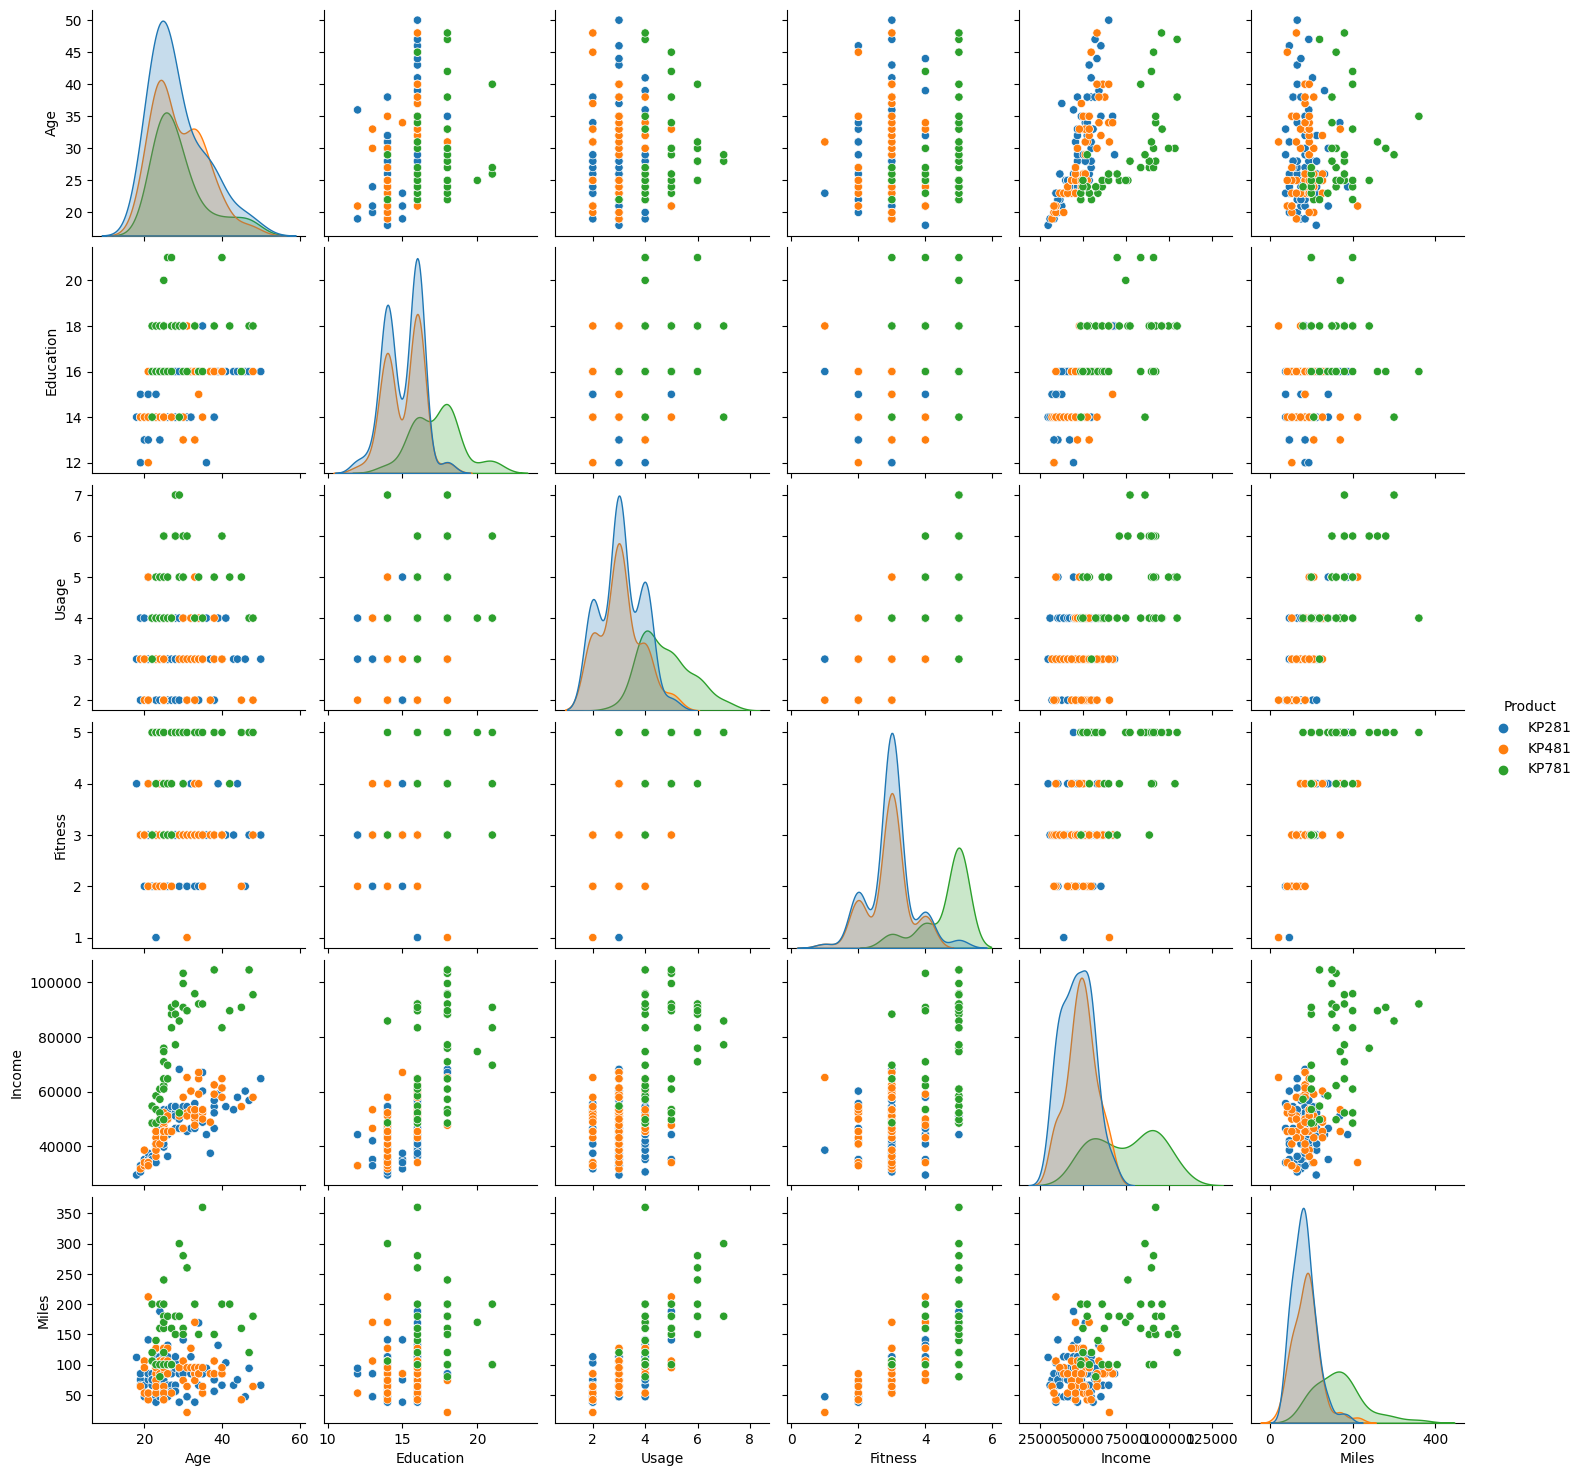

In [76]:
#Analyzing numerical-numerical data
sns.pairplot(data=df,hue='Product')
plt.show()

<ipython-input-75-dc88a25966d2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm',annot=True)


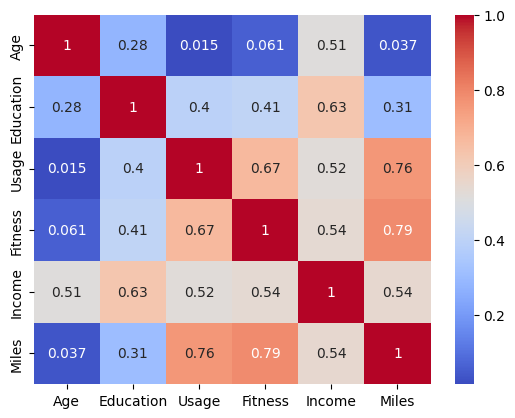

In [75]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

**#Insights**

--product1(i.e,kp281) will be most used product by males and females

--Young adults are mostly associated with 'Product 1' (kp281) usage

--Medium-aged adults are primarily linked with 'Product 2' (kp481) usage

--Couples tend to use all three products (kp281, kp481, and kp781) relatively evenly

--People with lower education levels are more likely to use 'Product 1' (kp281) predominantly

--Conversely, individuals with the highest education level are more likely to use 'Product 3' (kp781) primarily

--'Product 3' (kp781) is most used by individuals who rate themselves as 'Good fit' (rating 5)

--Highest income people use the product3(kp781) mostly


**#Recommendations**

--Target young adults and less educated individuals for 'Product 1' (kp281) marketing.

--Consider product diversification to appeal to medium-aged adults for 'Product 2' (kp481).

--Enhance features to cater to well-educated and fitness-conscious customers for 'Product 3' (kp781).